In [1]:
import tensorflow as tf 
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [39]:
# check tf version
tf.__version__

'2.16.1'

In [40]:
# check the size of train, test and validation

def check_size_data():
    base_dir = "../data/images/"
    for i in os.listdir(base_dir):
        print(f"for {i}") 
        for file in os.listdir(os.path.join(base_dir, i)): 
            print(file)
            print(f'{file} file has {len(os.listdir(os.path.join(base_dir + i, file )))}')
        print("=====================================") 
        # print(f'{i} has {len(os.path.join(base_dir, i))} photos')

check_size_data()

for train
ayam_betutu
ayam_betutu file has 40
ayam_pop
ayam_pop file has 40
bika_ambon
bika_ambon file has 40
gado_gado
gado_gado file has 40
kerak_telor
kerak_telor file has 40
lemang
lemang file has 40
pempek
pempek file has 40
rawon
rawon file has 40
rendang
rendang file has 40
sate_ayam
sate_ayam file has 40
for validation
ayam_betutu
ayam_betutu file has 12
ayam_pop
ayam_pop file has 10
bika_ambon
bika_ambon file has 10
gado_gado
gado_gado file has 10
kerak_telor
kerak_telor file has 10
lemang
lemang file has 10
pempek
pempek file has 10
rawon
rawon file has 10
rendang
rendang file has 9
sate_ayam
sate_ayam file has 10


In [41]:
def image_generator(training_dir, validation_dir):
    train_datagen = tf.keras.utils.image_dataset_from_directory(
        training_dir, 
        color_mode='rgb',
        batch_size=32, 
        image_size=(150, 150),
        shuffle=True,


    )
    # to directory
    # train_generator = train_datagen.flow_from_directory(
    #     directory = training_dir,
    #                  batch_size=20,
    #                  class_mode='categorical',
    #                  target_size=(150, 150)
    # )

    # for validation
    validation_datagen = tf.keras.utils.image_dataset_from_directory(
        validation_dir, 
        color_mode='rgb',
        batch_size=32, 
        image_size=(150, 150),
        shuffle=True, 
      
     

    )
    # to directory
    # validation_generator = validation_datagen.flow_from_directory(
    #     directory = validation_dir,
    #     batch_size=20,
    #     class_mode='binary',
    #     target_size=(150, 150)
    # )
    return train_datagen, validation_datagen

In [42]:
training_dir = "../data/images/train/"
validatiion_dir = "../data/images/validation/" 

train_gen, valid_gen = image_generator(training_dir, validatiion_dir)
# creating the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale = 1./255),
    tf.keras.layers.Input(shape=(150, 150, 3)), 
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding="same"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding="same"),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding="same"),
    tf.keras.layers.Conv2D(filters = 8, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding="same"),
    # flltern
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512, activation='relu'), 
    tf.keras.layers.Dense(units = 10, activation='softmax'), 
])

Found 399 files belonging to 10 classes.
Found 101 files belonging to 10 classes.


In [55]:
train_gen.class_names[6]

'pempek'

In [43]:
# 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Changed loss function
model.summary()
# model.fit(train_gen, epochs=20, validation_data=valid_gen)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# using transfer learning 
IMG_SHAPE = (150, 150) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_10752\1617969183.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,


In [45]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [46]:
base_model.trainable = False

In [47]:
()

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

# Definisikan layer-layer yang diperlukan
prediction_layer = tf.keras.layers.Dense(10, activation='softmax')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
scaler =  tf.keras.layers.Rescaling(1./255)



# Definisikan input layer
inputs = tf.keras.layers.Input(shape=(150, 150, 3)) 
x = scaler(inputs)
x = data_augmentation(x)
x = base_model(x, training = False)

# Gunakan layer-layer yang telah didefinisikan sebelumnya untuk memproses input
x = global_average_layer(x)
outputs = prediction_layer(x)

# Buat model dengan input dan output layer yang telah didefinisikan
model2 = tf.keras.Model(inputs, outputs)
model2.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [48]:
tf.keras.utils.plot_model(model2, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [49]:
AUTOTUNE = tf.data.AUTOTUNE



train_ds = train_gen.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = valid_gen.cache().prefetch(buffer_size=AUTOTUNE)

model2.compile(optimizer="adam",loss= tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
history2 = model2.fit(train_gen,epochs=20, validation_data=valid_gen)

Epoch 1/20


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step - accuracy: 0.1552 - loss: 2.6116 - val_accuracy: 0.4554 - val_loss: 1.6421
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.5981 - loss: 1.2316 - val_accuracy: 0.7129 - val_loss: 0.9909
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.7659 - loss: 0.8216 - val_accuracy: 0.8119 - val_loss: 0.6112
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.8292 - loss: 0.5778 - val_accuracy: 0.8416 - val_loss: 0.5657
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - accuracy: 0.8595 - loss: 0.4358 - val_accuracy: 0.8812 - val_loss: 0.4577
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.9071 - loss: 0.3486 - val_accuracy: 0.8812 - val_loss: 0.4692
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.9425 - loss: 0.2563 - val_accuracy: 0.8911 - val_loss: 0.3933
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.9111 - loss: 0.3020 - val_accuracy: 0.8911 - val_

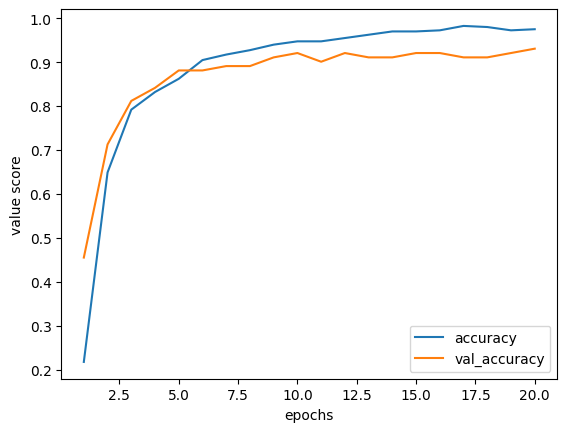

In [50]:
plt.plot([x for x in range(1, 21)], history2.history['accuracy'], label  = "accuracy")
plt.plot([x for x in range(1, 21)], history2.history['val_accuracy'], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("value score")
plt.legend()
plt.show()

In [51]:
model2.save("food_classifier.keras")

In [5]:



def preproccess_image(image): 
    img_height, img_width = 150, 150
    image_read = tf.io.read_file(image)
    img = tf.io.decode_jpeg(image_read, channels=3)
    image_resized = tf.image.resize(img, [img_height, img_width])
 
    return tf.expand_dims(image_resized, 0)
def classification_prediction(image): 
    model= tf.keras.models.load_model("./food_classifier.keras")
    img_pred = preproccess_image(image)
    classes = os.listdir("../data/images/train")
   
    return classes[np.argmax(model.predict(img_pred)[0])]


# image = cv2.imread("../data/images/train/ayam_pop/ayam_pop (6).jpg")
# classification_prediction(image=image)

In [6]:
# image = cv2.imread("./random.png")
classification_prediction(image="./random2.png")

c:\Users\Teddy Dharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


'ayam_pop'